In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
#columnnamesandindex
for idx, col in enumerate(df.columns):
    print(f"{idx}: {col}")


0: sepal_length
1: sepal_width
2: petal_length
3: petal_width
4: species


In [109]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
df.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
df.groupby('species').size()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [113]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

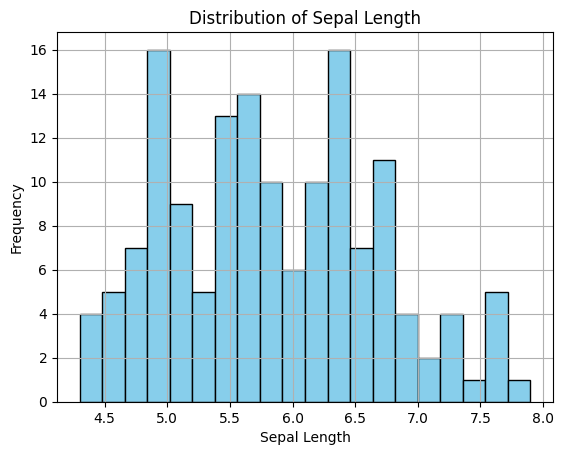

In [114]:
a = df['sepal_length'].hist(bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')

# Show the plot
plt.show()


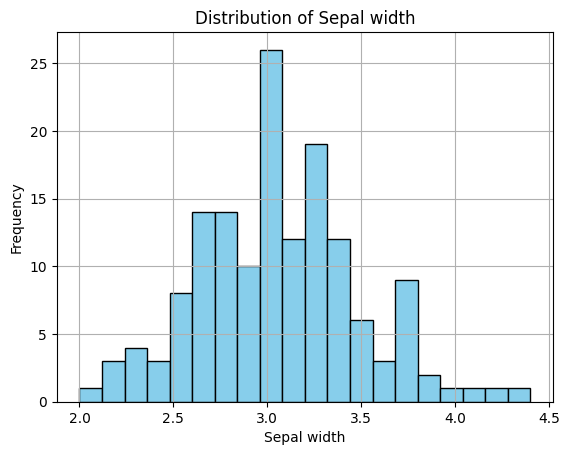

In [115]:
a = df['sepal_width'].hist(bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Sepal width')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal width')

# Show the plot
plt.show()


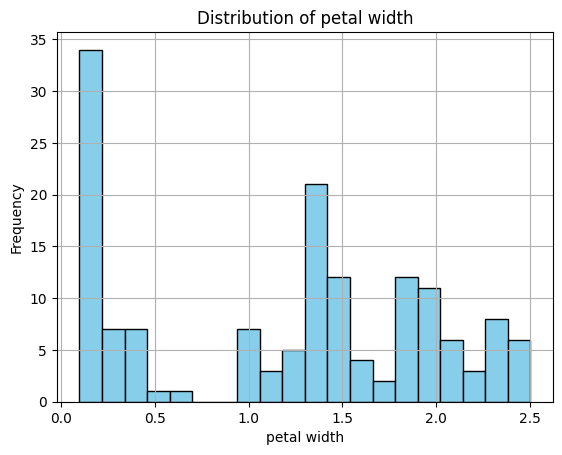

In [116]:
a = df['petal_width'].hist(bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('petal width')
plt.ylabel('Frequency')
plt.title('Distribution of petal width')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of petal length')

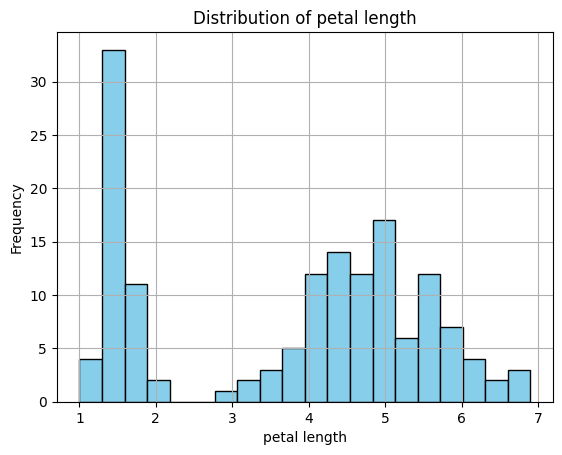

In [117]:
a = df['petal_length'].hist(bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('petal length')
plt.ylabel('Frequency')
plt.title('Distribution of petal length')

# Show the plot


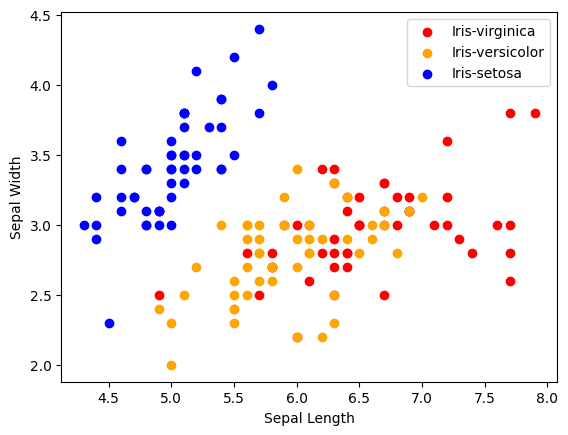

In [118]:
colours = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']  

for i in range(3):
    X = df[df['species'] == species[i]]
    plt.scatter(X['sepal_length'], X['sepal_width'], c=colours[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

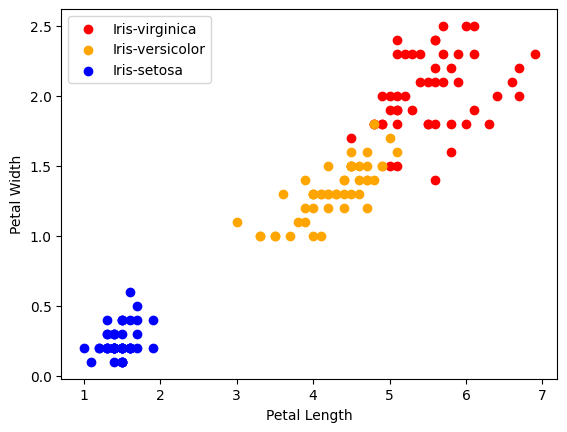

In [119]:
colours = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']  

for i in range(3):
    X = df[df['species'] == species[i]]
    plt.scatter(X['petal_length'], X['petal_width'], c=colours[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

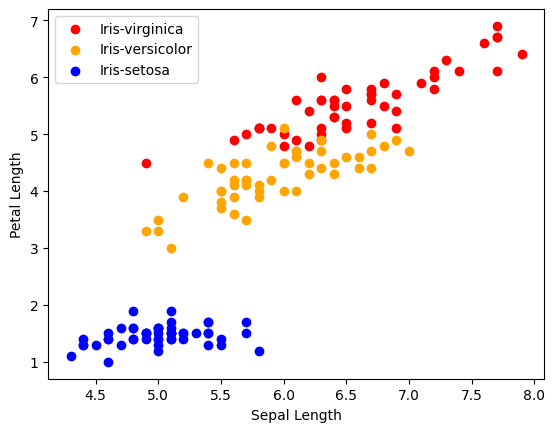

In [120]:
for i in range(3):
    x = df[df['species'] == species[i]] 
    plt.scatter(x['sepal_length'], x['petal_length'], c=colours[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

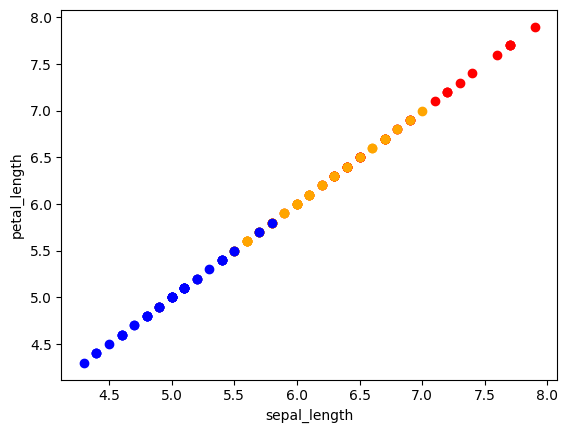

In [121]:
for i in range(3):
    x= df[df['species']== species [i]]
    plt.scatter(x['sepal_length'], x['sepal_length'], c=colours[i], label=species [i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

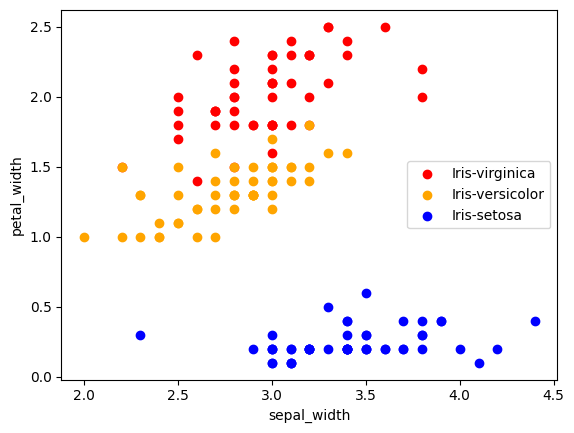

In [122]:
for i in range(3):
    x= df[df['species']== species [i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colours[i], label=species [i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()


In [123]:
label_encounder = LabelEncoder()

In [124]:
df['species']= label_encounder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
X = df.drop(columns='species')
X
Y = df['species']
Y
a=X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
a

[     sepal_length  sepal_width  petal_length  petal_width
 81            5.5          2.4           3.7          1.0
 133           6.3          2.8           5.1          1.5
 137           6.4          3.1           5.5          1.8
 75            6.6          3.0           4.4          1.4
 109           7.2          3.6           6.1          2.5
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [105 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [126]:
logistic_model = LogisticRegression(max_iter=200)

logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [127]:
y_pred = logistic_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [128]:
print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:,",classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 100.00%
Classification Report:,               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [129]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [131]:
print("\nK-Nearest Neighbors Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
